In [45]:
import re
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from rs.active_dict.loader import get_ad_word

AD_ROOT = '../freq2/'

In [14]:
all_words = sorted({re.match('[^\d]+', p.stem).group() for p in Path(AD_ROOT).joinpath('ad').glob('*.json')})
len(all_words)

1900

In [20]:
all_senses = list(filter(None, (get_ad_word(w, ad_root=AD_ROOT, with_contexts=False) for w in all_words)))
len(all_senses)

1898

In [60]:
def n_senses(senses):
    return [len(x['meanings']) for x in senses]

def plot_n_senses_hist(senses, title=None, log=False):
    plt.figure(figsize=(8, 2))
    if title is not None:
        plt.title(title)
    plt.hist(n_senses(senses), range=[0, 30], bins=31, log=log)

In [49]:
nouns = [s for s in all_senses if s['pos'] == 'СУЩ']
verbs = [s for s in all_senses if s['pos'] == 'ГЛАГ']
adjectives = [s for s in all_senses if s['pos'] == 'ПРИЛ']
named_senses = [('All', all_senses), ('Nouns', nouns), ('Verbs', verbs), ('Adjectives', adjectives)]

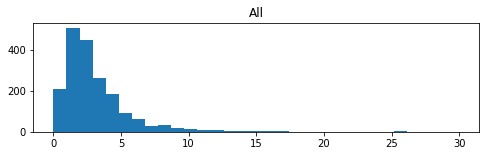

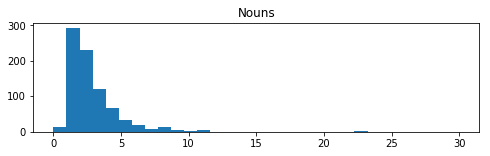

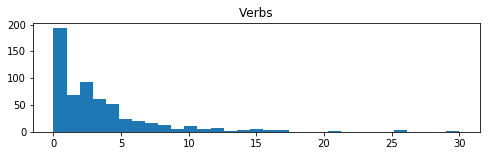

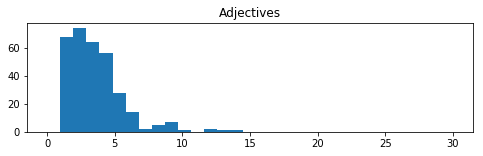

In [59]:
for name, senses in named_senses:
    plot_n_senses_hist(senses, name)

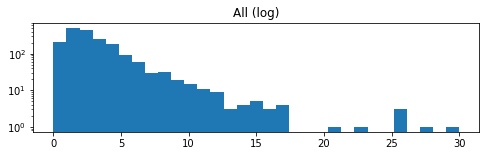

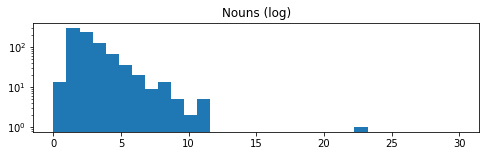

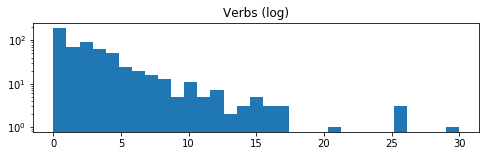

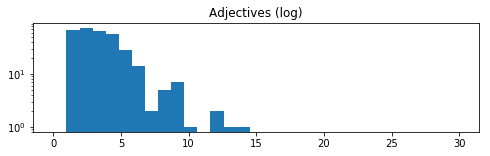

In [62]:
for name, senses in named_senses:
    plot_n_senses_hist(senses, name + ' (log)', log=True)

In [53]:
print('POS', 'Number', 'Mean', 'Median', sep='\t')
for name, senses in named_senses:
    print('{}\t{}\t{:.2f}\t{:.0f}'.format(
        name, len(senses), np.mean(n_senses(senses)), np.median(n_senses(senses))))

POS	Number	Mean	Median
All	1898	2.74	2
Nouns	812	2.44	2
Verbs	591	2.99	2
Adjectives	323	3.20	3
